In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 

dataset =pd.read_csv('C:/Users/Azib/Downloads/data_cleaned_2021.csv')
dataset

index                                          Job Title  \
0        0                                     Data Scientist   
1        1                          Healthcare Data Scientist   
2        2                                     Data Scientist   
3        3                                     Data Scientist   
4        4                                     Data Scientist   
5        5                                     Data Scientist   
6        6                                     Data Scientist   
7        7                                     Data Scientist   
8        8                                 Research Scientist   
9        9                                     Data Scientist   
10      10                                     Data Scientist   
11      11                                     Data Scientist   
12      12                  Staff Data Scientist - Technology   
13      13                                       Data Analyst   
14      14                                     Data Scientist   
15      15                                    Data Engineer I   
16      16                            Scientist I/II, Biology   
17      17                            Customer Data Scientist   
18      18             Data Scientist - Health Data Analytics   
19      19                                     Data Scientist   
20      20                                     Data Scientist   
21      21           Senior Data Scientist / Machine Learning   
22      22                      Data Scientist - Quantitative   
23      23                                     Data Scientist   
24      25                                     Data Scientist   
25      26                      Digital Health Data Scientist   
26      27                                     Data Scientist   
27      28                             Associate Data Analyst   
28      29                            Clinical Data Scientist   
29      30                                     Data Scientist   
30      31                                     Data Scientist   
31      32                                     Data Scientist   
32      33           Data Scientist / Machine Learning Expert   
33      34                                     Data Scientist   
34      35                                     Data Scientist   
35      36                                   Web Data Analyst   
36      37                                     Data Scientist   
37      38                                     Data Scientist   
38      39                              Senior Data Scientist   
39      40                                      Data Engineer   
40      41                                       Data Analyst   
41      43                                      Data Engineer   
42      44            Data Scientist - Algorithms & Inference   
43      45                                          Scientist   
44      46                              Senior Data Scientist   
45      48                                     Data Scientist   
46      49                                Lead Data Scientist   
47      50                             Associate Data Analyst   
48      51                        Spectral Scientist/Engineer   
49      52  College Hire - Data Scientist - Open to Decemb...   
50      54                                     Data Scientist   
51      55             Data Scientist, Office of Data Science   
52      56                               Data Science Analyst   
53      57                                     Data Scientist   
54      58                                     Data Scientist   
55      59                                     Data Scientist   
56      60                                     Data Scientist   
57      61                                     Data Scientist   
58      62                                     Data Scientist   
59      63                                     Data Scientist   
60      65                              

In [30]:
print("this dataset Contains",dataset.shape[0],"rows, and",dataset.shape[1],"columns")

this dataset Contains 742 rows, and 42 columns


In [31]:
pd.set_option("max_rows",None)
pd.set_option("max_columns",None)
dataset.head(2)

index                  Job Title              Salary Estimate  \
0      0             Data Scientist   $53K-$91K (Glassdoor est.)   
1      1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   

                                 Company Name         Location   Headquarters  \
0                      Tecolote Research\n3.8  Albuquerque, NM     Goleta, CA   
1  University of Maryland Medical System\n3.4    Linthicum, MD  Baltimore, MD   

          Size  Founded   Type of ownership                          Industry  \
0  501 - 1000      1973   Company - Private               Aerospace & Defense   
1      10000+      1984  Other Organization  Health Care Services & Hospitals   

                Sector                    Revenue Competitors  Hourly  \
0  Aerospace & Defense  $50 to $100 million (USD)          -1       0   
1          Health Care     $2 to $5 billion (USD)          -1       0   

   Employer provided  Lower Salary  Upper Salary  Avg Salary(K)  \
0                  0            53            91           72.0   
1                  0            63           112           87.5   

                             company_txt Job Location  Age  Python  spark  \
0                      Tecolote Research           NM   48       1      0   
1  University of Maryland Medical System           MD   37       1      0   

   aws  excel  sql  sas  keras  pytorch  scikit  tensor  hadoop  tableau  bi  \
0    0      1    0    1      0        0       0       0       0        1   1   
1    0      0    0    0      0        0       0       0       0        0   0   

   flink  mongo  google_an   job_title_sim seniority_by_title Degree  
0      0      0          0  data scientist                 na      M  
1      0      0          0  data scientist                 na      M

In [32]:
dataset.drop(columns = ['index'], inplace = True)
if dataset.duplicated().sum() == 0:
    print("no duplicated rows")
else:
    print(dataset.duplicated().sum(),"row are duplicated in dataset")

275 row are duplicated in dataset


In [33]:
dataset.drop_duplicates(inplace = True)
print("rows =",dataset.shape[0],"and columns =",dataset.shape[1])

rows = 467 and columns = 41


In [34]:
dataset.replace("-1",np.nan,inplace =True)
dataset.replace(-1,np.nan,inplace = True)
dataset.replace('na',np.nan,inplace =True)
dataset

Job Title  \
0                                       Data Scientist   
1                            Healthcare Data Scientist   
2                                       Data Scientist   
3                                       Data Scientist   
4                                       Data Scientist   
5                                       Data Scientist   
6                                       Data Scientist   
7                                       Data Scientist   
8                                   Research Scientist   
9                                       Data Scientist   
10                                      Data Scientist   
11                                      Data Scientist   
12                   Staff Data Scientist - Technology   
13                                        Data Analyst   
14                                      Data Scientist   
15                                     Data Engineer I   
16                             Scientist I/II, Biology   
17                             Customer Data Scientist   
18              Data Scientist - Health Data Analytics   
19                                      Data Scientist   
20                                      Data Scientist   
21            Senior Data Scientist / Machine Learning   
22                       Data Scientist - Quantitative   
23                                      Data Scientist   
24                                      Data Scientist   
25                       Digital Health Data Scientist   
26                                      Data Scientist   
27                              Associate Data Analyst   
28                             Clinical Data Scientist   
31                                      Data Scientist   
32            Data Scientist / Machine Learning Expert   
33                                      Data Scientist   
34                                      Data Scientist   
35                                    Web Data Analyst   
36                                      Data Scientist   
37                                      Data Scientist   
38                               Senior Data Scientist   
39                                       Data Engineer   
40                                        Data Analyst   
41                                       Data Engineer   
42             Data Scientist - Algorithms & Inference   
43                                           Scientist   
44                               Senior Data Scientist   
45                                      Data Scientist   
46                                 Lead Data Scientist   
47                              Associate Data Analyst   
48                         Spectral Scientist/Engineer   
49   College Hire - Data Scientist - Open to Decemb...   
50                                      Data Scientist   
51              Data Scientist, Office of Data Science   
52                                Data Science Analyst   
53                                      Data Scientist   
54                                      Data Scientist   
55                                      Data Scientist   
56                                      Data Scientist   
57                                      Data Scientist   
60                               Senior Data Scientist   
61                                      Data Scientist   
62                          Senior Risk Data Scientist   
63   Data Scientist in Artificial Intelligence Earl...   
64                                      Data Scientist   
65                                      Data Scientist   
66                                      Data Scientist   
67                           Data Scientist - Research   
68                                      Data Scientist   
69                         R&D Data Analysis Scientist   
70                                Analytics Consultant   
71                              Director, Data Science   
72                                         

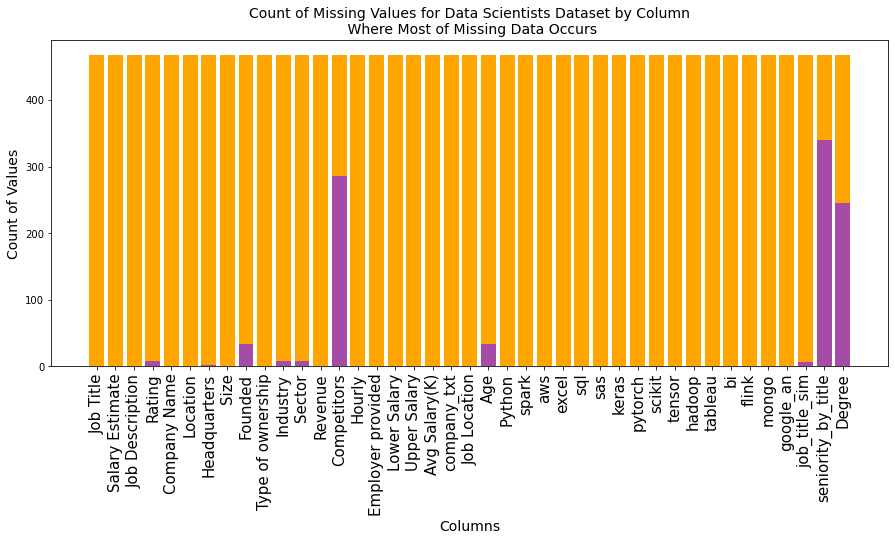

In [35]:
null_values=dataset.isnull().sum()
not_null =dataset.notnull().sum()

plt.figure(figsize=(15,6))
graph=plt.subplot()
plt.bar(range(len(dataset.columns)),null_values,color='purple',alpha=.7)
plt.bar(range(len(dataset.columns)),not_null,color='orange',bottom=null_values)
graph.set_xticks(range(len(dataset.columns)))
graph.set_xticklabels(dataset.columns,rotation=90,size=15)
plt.xlabel('Columns',size=14)
plt.ylabel('Count of Values',size=14)
plt.title('Count of Missing Values for Data Scientists Dataset by Column\n Where Most of Missing Data Occurs',size=14)
plt.show()

In [36]:
columns=[]
types=[]

for column in dataset.columns:
    columns.append(column)
    types.append(dataset[column].dtypes)
    
table=pd.DataFrame({'Column Name':columns,'Data Type':types})
table=table.groupby(['Column Name','Data Type']).last().reset_index()
pd.concat([d.reset_index(drop=True) for d in[table.loc[:13],table.loc[14:27],table.loc[28:]]], axis=1)

Column Name Data Type        Column Name Data Type  \
0                 Age   float64       Lower Salary     int64   
1       Avg Salary(K)   float64             Python     int64   
2        Company Name    object             Rating   float64   
3         Competitors    object            Revenue    object   
4              Degree    object    Salary Estimate    object   
5   Employer provided     int64             Sector    object   
6             Founded   float64               Size    object   
7        Headquarters    object  Type of ownership    object   
8              Hourly     int64       Upper Salary     int64   
9            Industry    object                aws     int64   
10    Job Description    object                 bi     int64   
11       Job Location    object        company_txt    object   
12          Job Title    object              excel     int64   
13           Location    object              flink     int64   

           Column Name Data Type  
0            google_an     int64  
1               hadoop     int64  
2        job_title_sim    object  
3                keras     int64  
4                mongo     int64  
5              pytorch     int64  
6                  sas     int64  
7               scikit     int64  
8   seniority_by_title    object  
9                spark     int64  
10                 sql     int64  
11             tableau     int64  
12              tensor     int64  
13                 NaN       NaN

In [37]:
dataset=dataset.drop(columns=['seniority_by_title','job_title_sim','Degree'])

In [38]:
dataset['Founded']=pd.to_datetime(dataset['Founded'],format='%Y',errors='ignore')

In [39]:
print("There are",len(dataset['Job Title'].unique()),"unique entries under Job Title column")

There are 264 unique entries under Job Title column


In [40]:
dataset.loc[200:205,'Job Title']

200                     Analytics Manager - Data Mart
201       Sr. Data Engineer - Contract-to-Hire (Java)
202         MED TECH/LAB SCIENTIST- SOUTH COASTAL LAB
203                        Food Scientist - Developer
204    Staff Scientist-Downstream Process Development
205                                 Sr. Data Engineer
Name: Job Title, dtype: object

In [41]:
dataset.loc[310:320,'Job Title']

311    Product Engineer – Data Science
314                     Data Scientist
315                Market Data Analyst
317                      Data Engineer
318                Staff Data Engineer
319            Associate Data Engineer
320              Senior Data Scientist
Name: Job Title, dtype: object

In [42]:
dataset['Job Title'] = dataset['Job Title'].str.lower()

dataset['Profession'] = dataset['Job Title'].str.extract('(machine learning engineer|data engineer|software engineer|modeler|administrator|research scientist|data scientist|marketing scientist|bi developer|statistician|architect|data analyst|business analyst|business intelligence analyst|quantitative analyst)')
dataset['Profession'] = dataset['Profession'].fillna('Other')
dataset['Profession'] = dataset['Profession'].apply(lambda x: re.sub(',[a-z ]+','',x))
dataset['Profession'] = dataset['Profession'].str.title()


In [43]:
dataset[dataset['Profession'] == 'Other']['Job Title'].head(7)

16        scientist i/ii, biology
43                      scientist
48    spectral scientist/engineer
52           data science analyst
69    r&d data analysis scientist
70           analytics consultant
71         director, data science
Name: Job Title, dtype: object

In [44]:
dataset.drop(columns=['Salary Estimate'], inplace = True)

In [45]:
dataset.drop(columns=['Company Name'], inplace = True)
dataset.rename(columns={"company_txt": "Company Name"}, inplace = True)

In [46]:
dataset['Location'] = dataset['Location'].apply(lambda x: re.sub(', [A-Z]+', "", x))
dataset.rename(columns = {'Location': 'Location (City)', 'Job Location': 'Location (State)'}, inplace = True)

In [47]:
dataset

Job Title  \
0                                       data scientist   
1                            healthcare data scientist   
2                                       data scientist   
3                                       data scientist   
4                                       data scientist   
5                                       data scientist   
6                                       data scientist   
7                                       data scientist   
8                                   research scientist   
9                                       data scientist   
10                                      data scientist   
11                                      data scientist   
12                   staff data scientist - technology   
13                                        data analyst   
14                                      data scientist   
15                                     data engineer i   
16                             scientist i/ii, biology   
17                             customer data scientist   
18              data scientist - health data analytics   
19                                      data scientist   
20                                      data scientist   
21            senior data scientist / machine learning   
22                       data scientist - quantitative   
23                                      data scientist   
24                                      data scientist   
25                       digital health data scientist   
26                                      data scientist   
27                              associate data analyst   
28                             clinical data scientist   
31                                      data scientist   
32            data scientist / machine learning expert   
33                                      data scientist   
34                                      data scientist   
35                                    web data analyst   
36                                      data scientist   
37                                      data scientist   
38                               senior data scientist   
39                                       data engineer   
40                                        data analyst   
41                                       data engineer   
42             data scientist - algorithms & inference   
43                                           scientist   
44                               senior data scientist   
45                                      data scientist   
46                                 lead data scientist   
47                              associate data analyst   
48                         spectral scientist/engineer   
49   college hire - data scientist - open to decemb...   
50                                      data scientist   
51              data scientist, office of data science   
52                                data science analyst   
53                                      data scientist   
54                                      data scientist   
55                                      data scientist   
56                                      data scientist   
57                                      data scientist   
60                               senior data scientist   
61                                      data scientist   
62                          senior risk data scientist   
63   data scientist in artificial intelligence earl...   
64                                      data scientist   
65                                      data scientist   
66                                      data scientist   
67                           data scientist - research   
68                                      data scientist   
69                         r&d data analysis scientist   
70                                analytics consultant   
71                              director, data science   
72                                         

In [48]:
dataset['Headquarters'] = dataset['Headquarters'].fillna('Not Available')
dataset['Headquarters (State)'] = dataset['Headquarters'].str.extract(', ([a-zA-Z]+)')
dataset['Headquarters'] = dataset['Headquarters'].apply(lambda x: re.sub(', [A-Z]{2}', "", x))
dataset.rename(columns = {'Headquarters': 'Headquarters (City)'}, inplace = True)
dataset['Headquarters (State)'] = dataset['Headquarters (State)'].fillna('Not Available')
dataset['Headquarters (State)'] = dataset['Headquarters (State)'].apply(lambda x: re.sub('[A-Z]{2}', 'United States', x))

In [49]:
dataset['Size'].unique()

array(['501 - 1000 ', '10000+ ', '1001 - 5000 ', '51 - 200 ',
       '201 - 500 ', '5001 - 10000 ', '1 - 50 ', 'unknown'], dtype=object)

In [50]:
dataset['Revenue'].unique()

array(['$50 to $100 million (USD)', '$2 to $5 billion (USD)',
       '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
       'Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$25 to $50 million (USD)', '$10+ billion (USD)',
       '$1 to $5 million (USD)', '$10 to $25 million (USD)',
       '$5 to $10 billion (USD)', 'Less than $1 million (USD)',
       '$5 to $10 million (USD)'], dtype=object)

In [51]:
print("The number of rows with missing Size data is",len(dataset[dataset['Size'] == 'unknown']))
print("The number of rows with missing Revenue data is",len(dataset[dataset['Revenue'] == 'Unknown / Non-Applicable']))

The number of rows with missing Size data is 6
The number of rows with missing Revenue data is 134


In [52]:
dataset['Size']=pd.Categorical(dataset['Size'],['1 - 50 ', '51 - 200 ', '201 - 500 ', '501 - 1000 ','1001 - 5000 ', '5001 - 10000 ', '10000+ '], ordered=True)
dataset['Revenue'] = pd.Categorical(dataset['Revenue'], ['Less than $1 million (USD)', '$1 to $5 million (USD)', '$5 to $10 million (USD)', '$10 to $25 million (USD)','$25 to $50 million (USD)', '$50 to $100 million (USD)', '$100 to $500 million (USD)','$500 million to $1 billion (USD)','$1 to $2 billion (USD)','$2 to $5 billion (USD)','$5 to $10 billion (USD)','$10+ billion (USD)'], ordered=True)

In [53]:
dataset.head(4)

Job Title  \
0             data scientist   
1  healthcare data scientist   
2             data scientist   
3             data scientist   

                                     Job Description  Rating Location (City)  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8     Albuquerque   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4       Linthicum   
2  KnowBe4, Inc. is a high growth information sec...     4.8      Clearwater   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8        Richland   

  Headquarters (City)          Size    Founded   Type of ownership  \
0              Goleta   501 - 1000  1973-01-01   Company - Private   
1           Baltimore       10000+  1984-01-01  Other Organization   
2          Clearwater   501 - 1000  2010-01-01   Company - Private   
3            Richland  1001 - 5000  1965-01-01          Government   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   

                            Revenue  \
0         $50 to $100 million (USD)   
1            $2 to $5 billion (USD)   
2        $100 to $500 million (USD)   
3  $500 million to $1 billion (USD)   

                                         Competitors  Hourly  \
0                                                NaN       0   
1                                                NaN       0   
2                                                NaN       0   
3  Oak Ridge National Laboratory, National Renewa...       0   

   Employer provided  Lower Salary  Upper Salary  Avg Salary(K)  \
0                  0            53            91           72.0   
1                  0            63           112           87.5   
2                  0            80            90           85.0   
3                  0            56            97           76.5   

                            Company Name Location (State)   Age  Python  \
0                      Tecolote Research               NM  48.0       1   
1  University of Maryland Medical System               MD  37.0       1   
2                                KnowBe4               FL  11.0       1   
3                                   PNNL               WA  56.0       1   

   spark  aws  excel  sql  sas  keras  pytorch  scikit  tensor  hadoop  \
0      0    0      1    0    1      0        0       0       0       0   
1      0    0      0    0    0      0        0       0       0       0   
2      1    0      1    1    1      0        0       0       0       0   
3      0    0      0    0    0      0        0       0       0       0   

   tableau  bi  flink  mongo  google_an      Profession Headquarters (State)  
0        1   1      0      0          0  Data Scientist        United States  
1        0   0      0      0          0  Data Scientist        United States  
2        0   0      0      0          0  Data Scientist        United States  
3        0   0      0      0          0  Data Scientist        United States

In [54]:
pip install pywaffle

Note: you may need to restart the kernel to use updated packages.


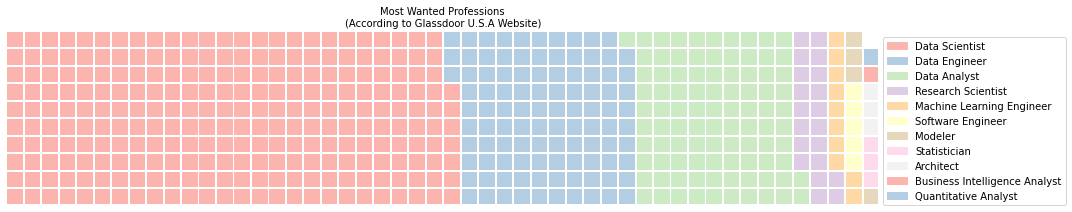

In [55]:
from pywaffle import Waffle

profession_vis = dataset[dataset['Profession'] != 'Other']['Profession'].value_counts().to_dict()

plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=50,
    values=profession_vis,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    figsize=(15,8),
    cmap_name="Pastel1"
)

plt.title("Most Wanted Professions\n(According to Glassdoor U.S.A Website)",fontsize=10)
plt.show()

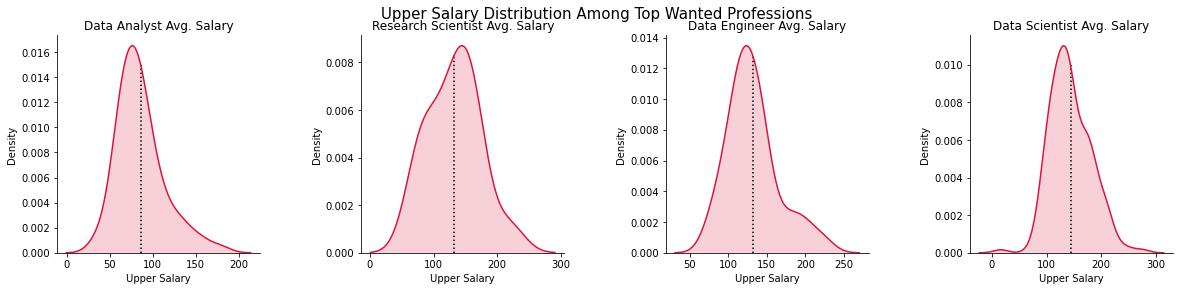

In [56]:
data_science = dataset[dataset['Profession'] == 'Data Scientist']['Upper Salary']
data_engineer = dataset[dataset['Profession'] == 'Data Engineer']['Upper Salary']
data_analyst = dataset[dataset['Profession'] == 'Data Analyst']['Upper Salary']
research_scientist = dataset[dataset['Profession'] == 'Research Scientist']['Upper Salary']

plt.figure(figsize=(20,4))

ax1 = plt.subplot(1,4,1)
ax1 = sns.kdeplot(data_analyst, color='crimson', shade=False)
kdeline = ax1.lines[0]
mean = data_analyst.mean()
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)
ax1.vlines(mean, 0, height, color='black', ls=':')
ax1.fill_between(xs, 0, ys, facecolor='crimson', alpha=0.2)
plt.title('Data Analyst Avg. Salary')

for s in ['top', 'right']:
    ax1.spines[s].set_visible(False)

ax2 = plt.subplot(1,4,2)
ax2 = sns.kdeplot(research_scientist, color='crimson', shade=False)
kdeline = ax2.lines[0]
mean = research_scientist.mean()
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)
ax2.vlines(mean, 0, height, color='black', ls=':')
ax2.fill_between(xs, 0, ys, facecolor='crimson', alpha=0.2)
plt.title('Research Scientist Avg. Salary')

for s in ['top', 'right']:
    ax2.spines[s].set_visible(False)

ax3 = plt.subplot(1,4,3)
ax3 = sns.kdeplot(data_engineer, color='crimson', shade=False)
kdeline = ax3.lines[0]
mean = data_engineer.mean()
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)
ax3.vlines(mean, 0, height, color='black', ls=':')
ax3.fill_between(xs, 0, ys, facecolor='crimson', alpha=0.2)
plt.title('Data Engineer Avg. Salary')

for s in ['top', 'right']:
    ax3.spines[s].set_visible(False)

ax4 = plt.subplot(1,4,4)
ax4 = sns.kdeplot(data_science, color='crimson', shade=False)
kdeline = ax4.lines[0]
mean = data_science.mean()
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)
ax4.vlines(mean, 0, height, color='black', ls=':')
ax4.fill_between(xs, 0, ys, facecolor='crimson', alpha=0.2)
plt.title('Data Scientist Avg. Salary')

for s in ['top', 'right']:
    ax4.spines[s].set_visible(False)

plt.subplots_adjust(wspace=0.5)
plt.suptitle('Upper Salary Distribution Among Top Wanted Professions',fontsize=15)
plt.show()

C:\Users\Azib\AppData\Local\Temp/ipykernel_21500/3327439048.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data =dataset[['Location (State)','Avg Salary(K)']].groupby('Location (State)').apply(lambda x:x.mean())
C:\Users\Azib\AppData\Local\Temp/ipykernel_21500/3327439048.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.vlines(x=data.index, ymin=0, ymax=data['Avg Salary(K)'],Color='Crimson',alpha=0.5,linewidth=20)


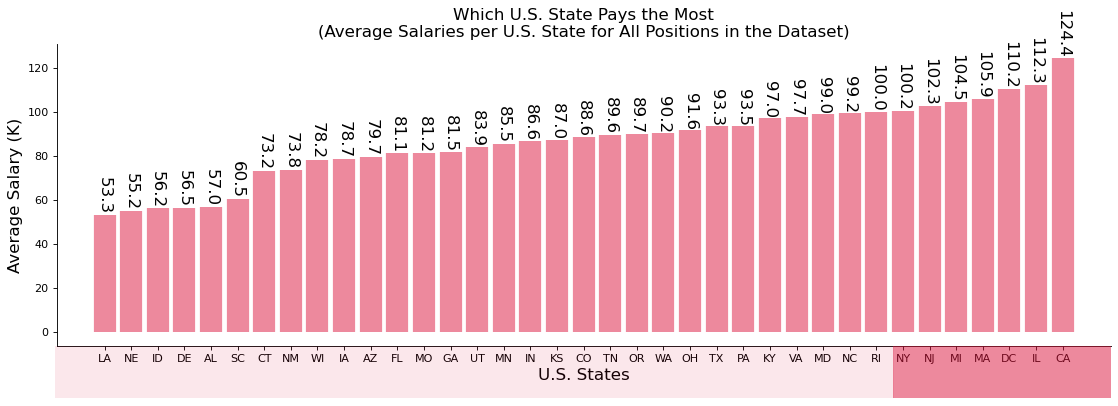

In [81]:
data =dataset[['Location (State)','Avg Salary(K)']].groupby('Location (State)').apply(lambda x:x.mean())
data.sort_values('Avg Salary(K)', inplace=True)
data.reset_index(inplace=True)

import matplotlib.patches as patches

fig, ax =plt.subplots(figsize=(17,5), facecolor='white',dpi=80)
ax.vlines(x=data.index, ymin=0, ymax=data['Avg Salary(K)'],Color='Crimson',alpha=0.5,linewidth=20)

for i, salary in enumerate(data['Avg Salary(K)']):
    ax.text(i, salary+1.5, round(salary,1),horizontalalignment='center',fontsize=15,rotation=270)
    
ax.set_xticks(range(len(data)))
ax.set_xticklabels(list(data['Location (State)']))
plt.title("Which U.S. State Pays the Most\n(Average Salaries per U.S. State for All Positions in the Dataset)",size=15)
plt.xlabel('U.S. States',size=15)
plt.ylabel('Average Salary (K)',size=15)

for s in ['top','right']:
    ax.spines[s].set_visible(False)

p1 = patches.Rectangle((.74,-0.005),width=.16,height=.13,alpha=.5,facecolor='crimson',transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.617, height=.13, alpha=.1, facecolor='crimson', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()